# Creating and formatting graphics with matplotlib

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/Users/claudiacarvalho/Data/data_analytics/Week_04


## Parts of a graphic in matplotlib

<figure>
  <img src="https://matplotlib.org/3.5.0/_images/sphx_glr_anatomy_001.png" alt="" style="width:50%", align="left">
</figure>

## Named colors supported in matplotlib

This plots a list of the named colors supported in matplotlib. Note that xkcd colors are supported as well, but are not listed here for brevity.

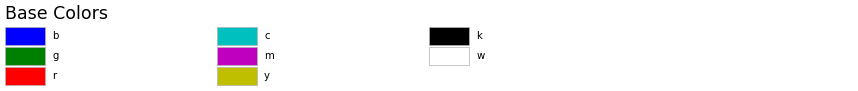

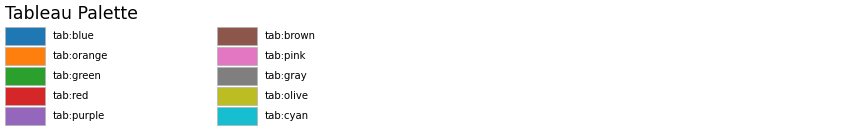

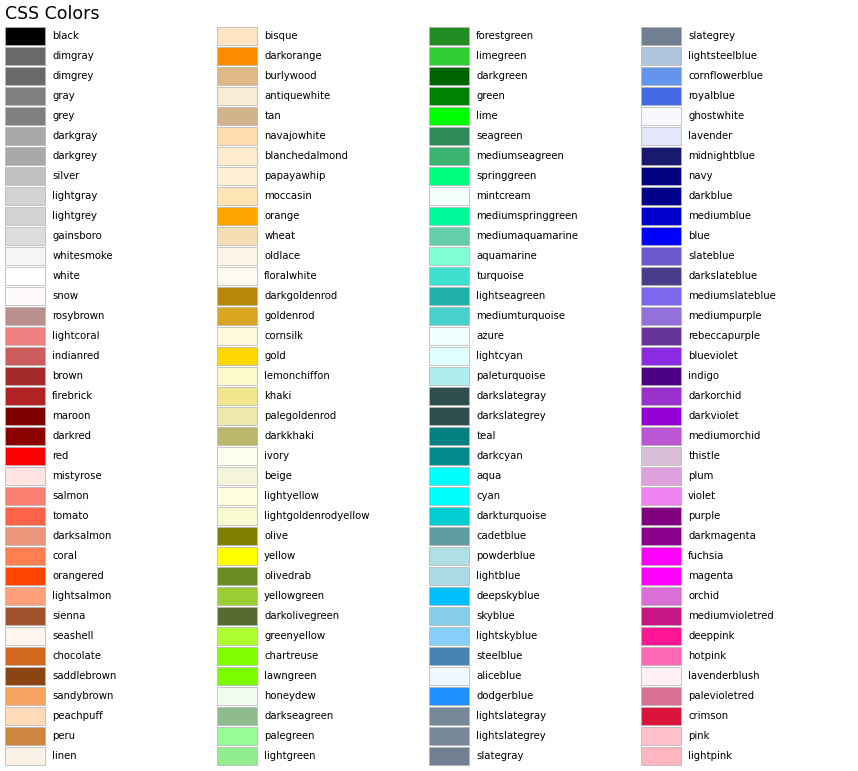

In [2]:
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 20
    swatch_width = 40
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 52

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

## Marker symbols

(0.0, 1.5)

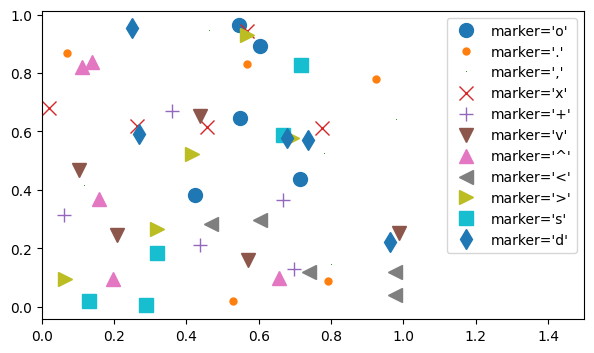

In [3]:
# Different marker symbols in one plot
rng = np.random.RandomState(0)

plt.figure(figsize=(7,4))
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker), markersize=10)
plt.legend(numpoints=1, fontsize=10)
plt.xlim(0, 1.5)

## Scatterplot with individual marker symbols

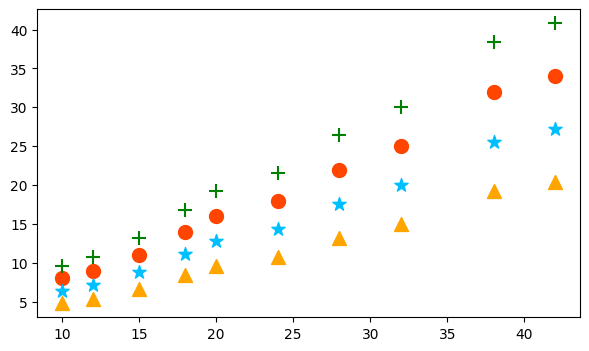

In [4]:
# Data
x = [10, 12, 15, 18, 20, 24, 28, 32, 38, 42]
y = [8, 9, 11, 14, 16, 18, 22, 25, 32, 34]
z = list(map(lambda x : x*1.2, y))
g = list(map(lambda x : x*0.8, y))
e = list(map(lambda x : x*0.6, y))
  
# Create a figure and axes
plt.figure(figsize=(7,4))

# Function to plot and show graph
scatter_01 = plt.scatter(x, y, s=100, marker='o', color='orangered')
scatter_02 = plt.scatter(x, z, s=100, marker='+', color='green')
scatter_03 = plt.scatter(x, g, s=100, marker='*', color='deepskyblue')
scatter_04 = plt.scatter(x, e, s=100, marker='^', color='orange')

plt.show()

## Formatting axes and setting limits and ticks

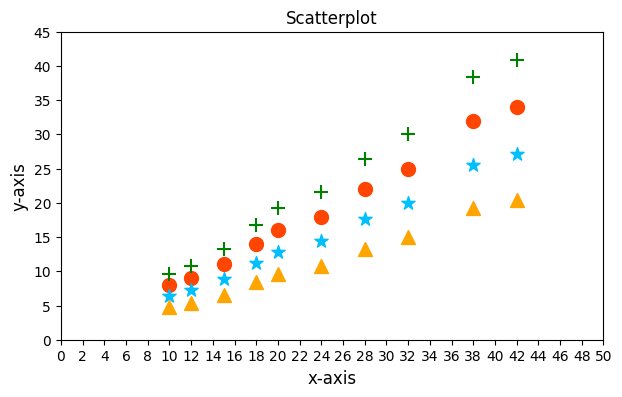

In [5]:
# Data
x = [10, 12, 15, 18, 20, 24, 28, 32, 38, 42]
y = [8, 9, 11, 14, 16, 18, 22, 25, 32, 34]
z = list(map(lambda x : x*1.2, y))
g = list(map(lambda x : x*0.8, y))
e = list(map(lambda x : x*0.6, y))
  
# Create a figure and axes
plt.figure(figsize=(7,4))
  
# Title and axes labels
plt.title('Scatterplot', fontsize=12)
plt.ylabel('y-axis', fontsize=12)
plt.xlabel('x-axis', fontsize=12)

# Set tick labels locations
plt.xticks(np.arange(0, 60, step=2)) 
plt.yticks(np.arange(0, 60, step=5)) 

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Set x, y-axis limits
plt.xlim(0, 50)
plt.ylim(0, 45)

# Function to plot and show graph
scatter_01 = plt.scatter(x, y, s=100, marker='o', color='orangered')
scatter_02 = plt.scatter(x, z, s=100, marker='+', color='green')
scatter_03 = plt.scatter(x, g, s=100, marker='*', color='deepskyblue')
scatter_04 = plt.scatter(x, e, s=100, marker='^', color='orange')

plt.show()

## Adding a legend

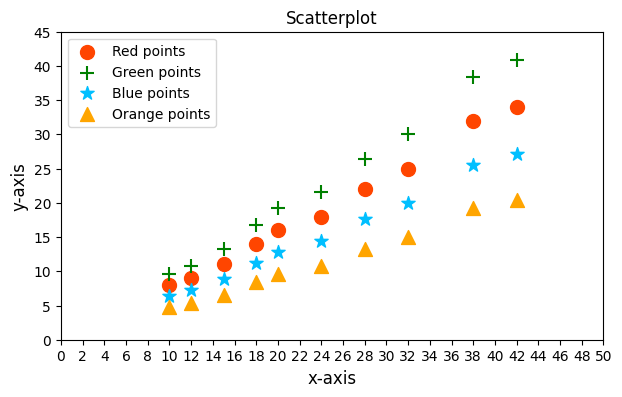

In [6]:
# Data
x = [10, 12, 15, 18, 20, 24, 28, 32, 38, 42]
y = [8, 9, 11, 14, 16, 18, 22, 25, 32, 34]
z = list(map(lambda x : x*1.2, y))
g = list(map(lambda x : x*0.8, y))
e = list(map(lambda x : x*0.6, y))
  
# Create a figure and axes
plt.figure(figsize=(7,4))
  
# Title and axes labels
plt.title('Scatterplot', fontsize=12)
plt.ylabel('y-axis', fontsize=12)
plt.xlabel('x-axis', fontsize=12)

# Set tick labels locations
plt.xticks(np.arange(0, 60, step=2)) 
plt.yticks(np.arange(0, 60, step=5)) 

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Set x, y-axis limits
plt.xlim(0, 50)
plt.ylim(0, 45)

# Function to plot and show graph
scatter_01 = plt.scatter(x, y, s=100, marker='o', color='orangered')
scatter_02 = plt.scatter(x, z, s=100, marker='+', color='green')
scatter_03 = plt.scatter(x, g, s=100, marker='*', color='deepskyblue')
scatter_04 = plt.scatter(x, e, s=100, marker='^', color='orange')

# Add Legend
plt.legend(handles = [scatter_01, scatter_02, scatter_03, scatter_04], 
           labels = ['Red points', 'Green points', 'Blue points', 'Orange points'],
           loc="upper left",
           fontsize=10)

plt.show()

## Adding a text annotation

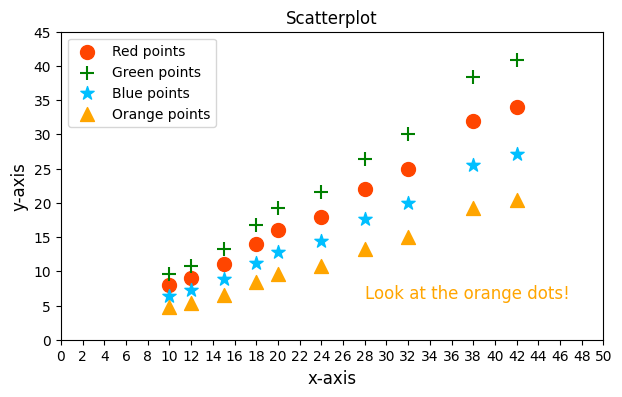

In [9]:
# Data
x = [10, 12, 15, 18, 20, 24, 28, 32, 38, 42]
y = [8, 9, 11, 14, 16, 18, 22, 25, 32, 34]
z = list(map(lambda x : x*1.2, y))
g = list(map(lambda x : x*0.8, y))
e = list(map(lambda x : x*0.6, y))
  
# Create a figure and axes
plt.figure(figsize=(7,4))
  
# Title and axes labels
plt.title('Scatterplot', fontsize=12)
plt.ylabel('y-axis', fontsize=12)
plt.xlabel('x-axis', fontsize=12)

# Set tick labels locations
plt.xticks(np.arange(0, 60, step=2)) 
plt.yticks(np.arange(0, 60, step=5)) 

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Set x, y-axis limits
plt.xlim(0, 50)
plt.ylim(0, 45)

# Function to plot and show graph
scatter_01 = plt.scatter(x, y, s=100, marker='o', color='orangered')
scatter_02 = plt.scatter(x, z, s=100, marker='+', color='green')
scatter_03 = plt.scatter(x, g, s=100, marker='*', color='deepskyblue')
scatter_04 = plt.scatter(x, e, s=100, marker='^', color='orange')

# Add Legend
plt.legend(handles = [scatter_01, scatter_02, scatter_03, scatter_04], 
           labels = ['Red points', 'Green points', 'Blue points', 'Orange points'],
           loc="upper left",
           fontsize=10)

# Add text annotation
plt.text(28, 6, s="Look at the orange dots!", fontsize=12, color="orange")

plt.show()

## Adding a grid

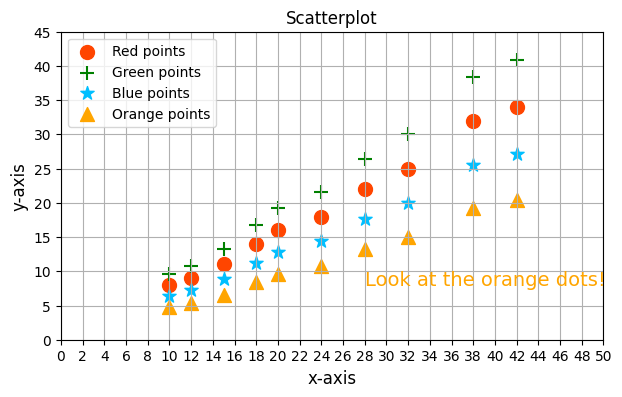

In [10]:
# Data
x = [10, 12, 15, 18, 20, 24, 28, 32, 38, 42]
y = [8, 9, 11, 14, 16, 18, 22, 25, 32, 34]
z = list(map(lambda x : x*1.2, y))
g = list(map(lambda x : x*0.8, y))
e = list(map(lambda x : x*0.6, y))
  
# Create a figure and axes
plt.figure(figsize=(7,4))
  
# Title and axes labels
plt.title('Scatterplot', fontsize=12)
plt.ylabel('y-axis', fontsize=12)
plt.xlabel('x-axis', fontsize=12)

# Set tick labels locations
plt.xticks(np.arange(0, 60, step=2)) 
plt.yticks(np.arange(0, 60, step=5)) 

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Set x, y-axis limits
plt.xlim(0, 50)
plt.ylim(0, 45)

# Function to plot and show graph
scatter_01 = plt.scatter(x, y, s=100, marker='o', color='orangered')
scatter_02 = plt.scatter(x, z, s=100, marker='+', color='green')
scatter_03 = plt.scatter(x, g, s=100, marker='*', color='deepskyblue')
scatter_04 = plt.scatter(x, e, s=100, marker='^', color='orange')

# Add Legend
plt.legend(handles = [scatter_01, scatter_02, scatter_03, scatter_04], 
           labels = ['Red points', 'Green points', 'Blue points', 'Orange points'],
           loc="upper left",
           fontsize=10)

# Add text annotation
plt.text(28, 8, s="Look at the orange dots!", fontsize=14, color="orange")

# Adding a grid to the plot
plt.grid()

plt.show()

## Creating multiplots with .subplots()

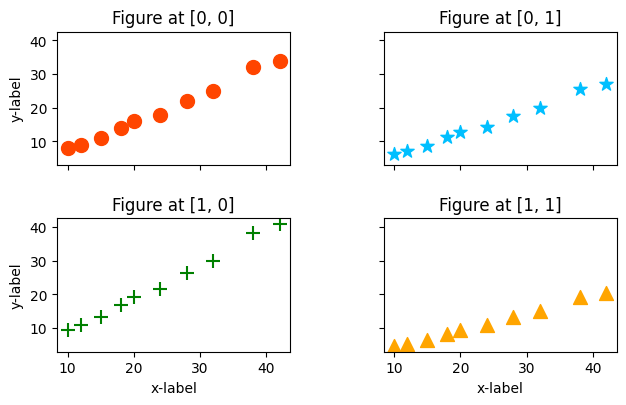

In [11]:
# Define 2x2 subplots and whether x- and y-axes should be shared
fig, ax = plt.subplots(2, 2, figsize=(7,4), sharex=True, sharey=True)

ax[0, 0].scatter(x, y, s=100, marker='o', color='orangered') # row=0, col=0
ax[1, 0].scatter(x, z, s=100, marker='+', color='green') # row=1, col=0
ax[0, 1].scatter(x, g, s=100, marker='*', color='deepskyblue') # row=0, col=1
ax[1, 1].scatter(x, e, s=100, marker='^', color='orange') # row=1, col=1

# Adding title
ax[0, 0].set_title('Figure at [0, 0]', fontsize = 12)
ax[1, 0].set_title('Figure at [1, 0]', fontsize = 12)
ax[0, 1].set_title('Figure at [0, 1]', fontsize = 12)
ax[1, 1].set_title('Figure at [1, 1]', fontsize = 12)

# Adding x-labels
ax[0, 0].set_xlabel('', fontsize = 10)
ax[1, 0].set_xlabel('x-label', fontsize = 10)
ax[0, 1].set_xlabel('', fontsize = 10)
ax[1, 1].set_xlabel('x-label', fontsize = 10)

# Adding y-labels
ax[0, 0].set_ylabel('y-label', fontsize = 10)
ax[1, 0].set_ylabel('y-label', fontsize = 10)
ax[0, 1].set_ylabel('', fontsize = 10)
ax[1, 1].set_ylabel('', fontsize = 10)

# Set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

## Saving figure to file

In [12]:
# Define 2x2 subplots and whether x- and y-axes should be shared
fig, ax = plt.subplots(2, 2, figsize=(7,4), sharex=True, sharey=True)

ax[0, 0].scatter(x, y, s=100, marker='o', color='orangered') # row=0, col=0
ax[1, 0].scatter(x, z, s=100, marker='+', color='green') # row=1, col=0
ax[0, 1].scatter(x, g, s=100, marker='*', color='deepskyblue') # row=0, col=1
ax[1, 1].scatter(x, e, s=100, marker='^', color='orange') # row=1, col=1

# Adding title
ax[0, 0].set_title('Figure at [0, 0]', fontsize = 12)
ax[1, 0].set_title('Figure at [1, 0]', fontsize = 12)
ax[0, 1].set_title('Figure at [0, 1]', fontsize = 12)
ax[1, 1].set_title('Figure at [1, 1]', fontsize = 12)

# Adding x-labels
ax[0, 0].set_xlabel('', fontsize = 10)
ax[1, 0].set_xlabel('x-label', fontsize = 10)
ax[0, 1].set_xlabel('', fontsize = 10)
ax[1, 1].set_xlabel('x-label', fontsize = 10)

# Adding y-labels
ax[0, 0].set_ylabel('y-label', fontsize = 10)
ax[1, 0].set_ylabel('y-label', fontsize = 10)
ax[0, 1].set_ylabel('', fontsize = 10)
ax[1, 1].set_ylabel('', fontsize = 10)

# Set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Save figure above to file
plt.savefig('myplot.png')

# Close connections
plt.close()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [13]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 24.6.0
Datetime: 2025-12-09 18:09:09
Python Version: 3.14.0
-----------------------------------
